# Overview
This is a practice using hyperparameter tuning of models using the GridSearchCV. We ended with an rsquared value of **0.50** resulting from the XBRegressor Model. Hopefully, we will get a better score if we take care of outliers, and some further feature engineering.

## What is HyperParameter Tuning?
Hyperparameter tuning is a simple way to find which parameter values are best for a model. Just as the name implies, it(GridSearchCV) takes every possible parameter of a model you pass to it, tunes them and get the best parameters for the model.

# Loading Libraries
Importing the Necessary Libraries required for the task

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data & EDA

In [2]:
df = pd.read_csv('../input/car-price-prediction-challenge/car_price_prediction.csv')

In [3]:
df.shape

(19237, 18)

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [11]:
for col in df.columns:
    print(f"{col} with {df[col].nunique()} values")

ID with 18924 values
Price with 2315 values
Levy with 559 values
Manufacturer with 65 values
Model with 1590 values
Prod. year with 54 values
Category with 11 values
Leather interior with 2 values
Fuel type with 7 values
Engine volume with 107 values
Mileage with 7687 values
Cylinders with 13 values
Gear box type with 4 values
Drive wheels with 3 values
Doors with 3 values
Wheel with 2 values
Color with 16 values
Airbags with 17 values


In [12]:
df.drop("ID", axis=1, inplace=True)

In [13]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [14]:
df['Mileage'] = df['Mileage'].str.replace("km", '')

In [15]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [17]:
cat_columns = [col for col in df.columns if df[col].dtype=="O"]
cat_columns

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

# Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

In [20]:
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
    

In [21]:
df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2


<Figure size 1080x1080 with 0 Axes>

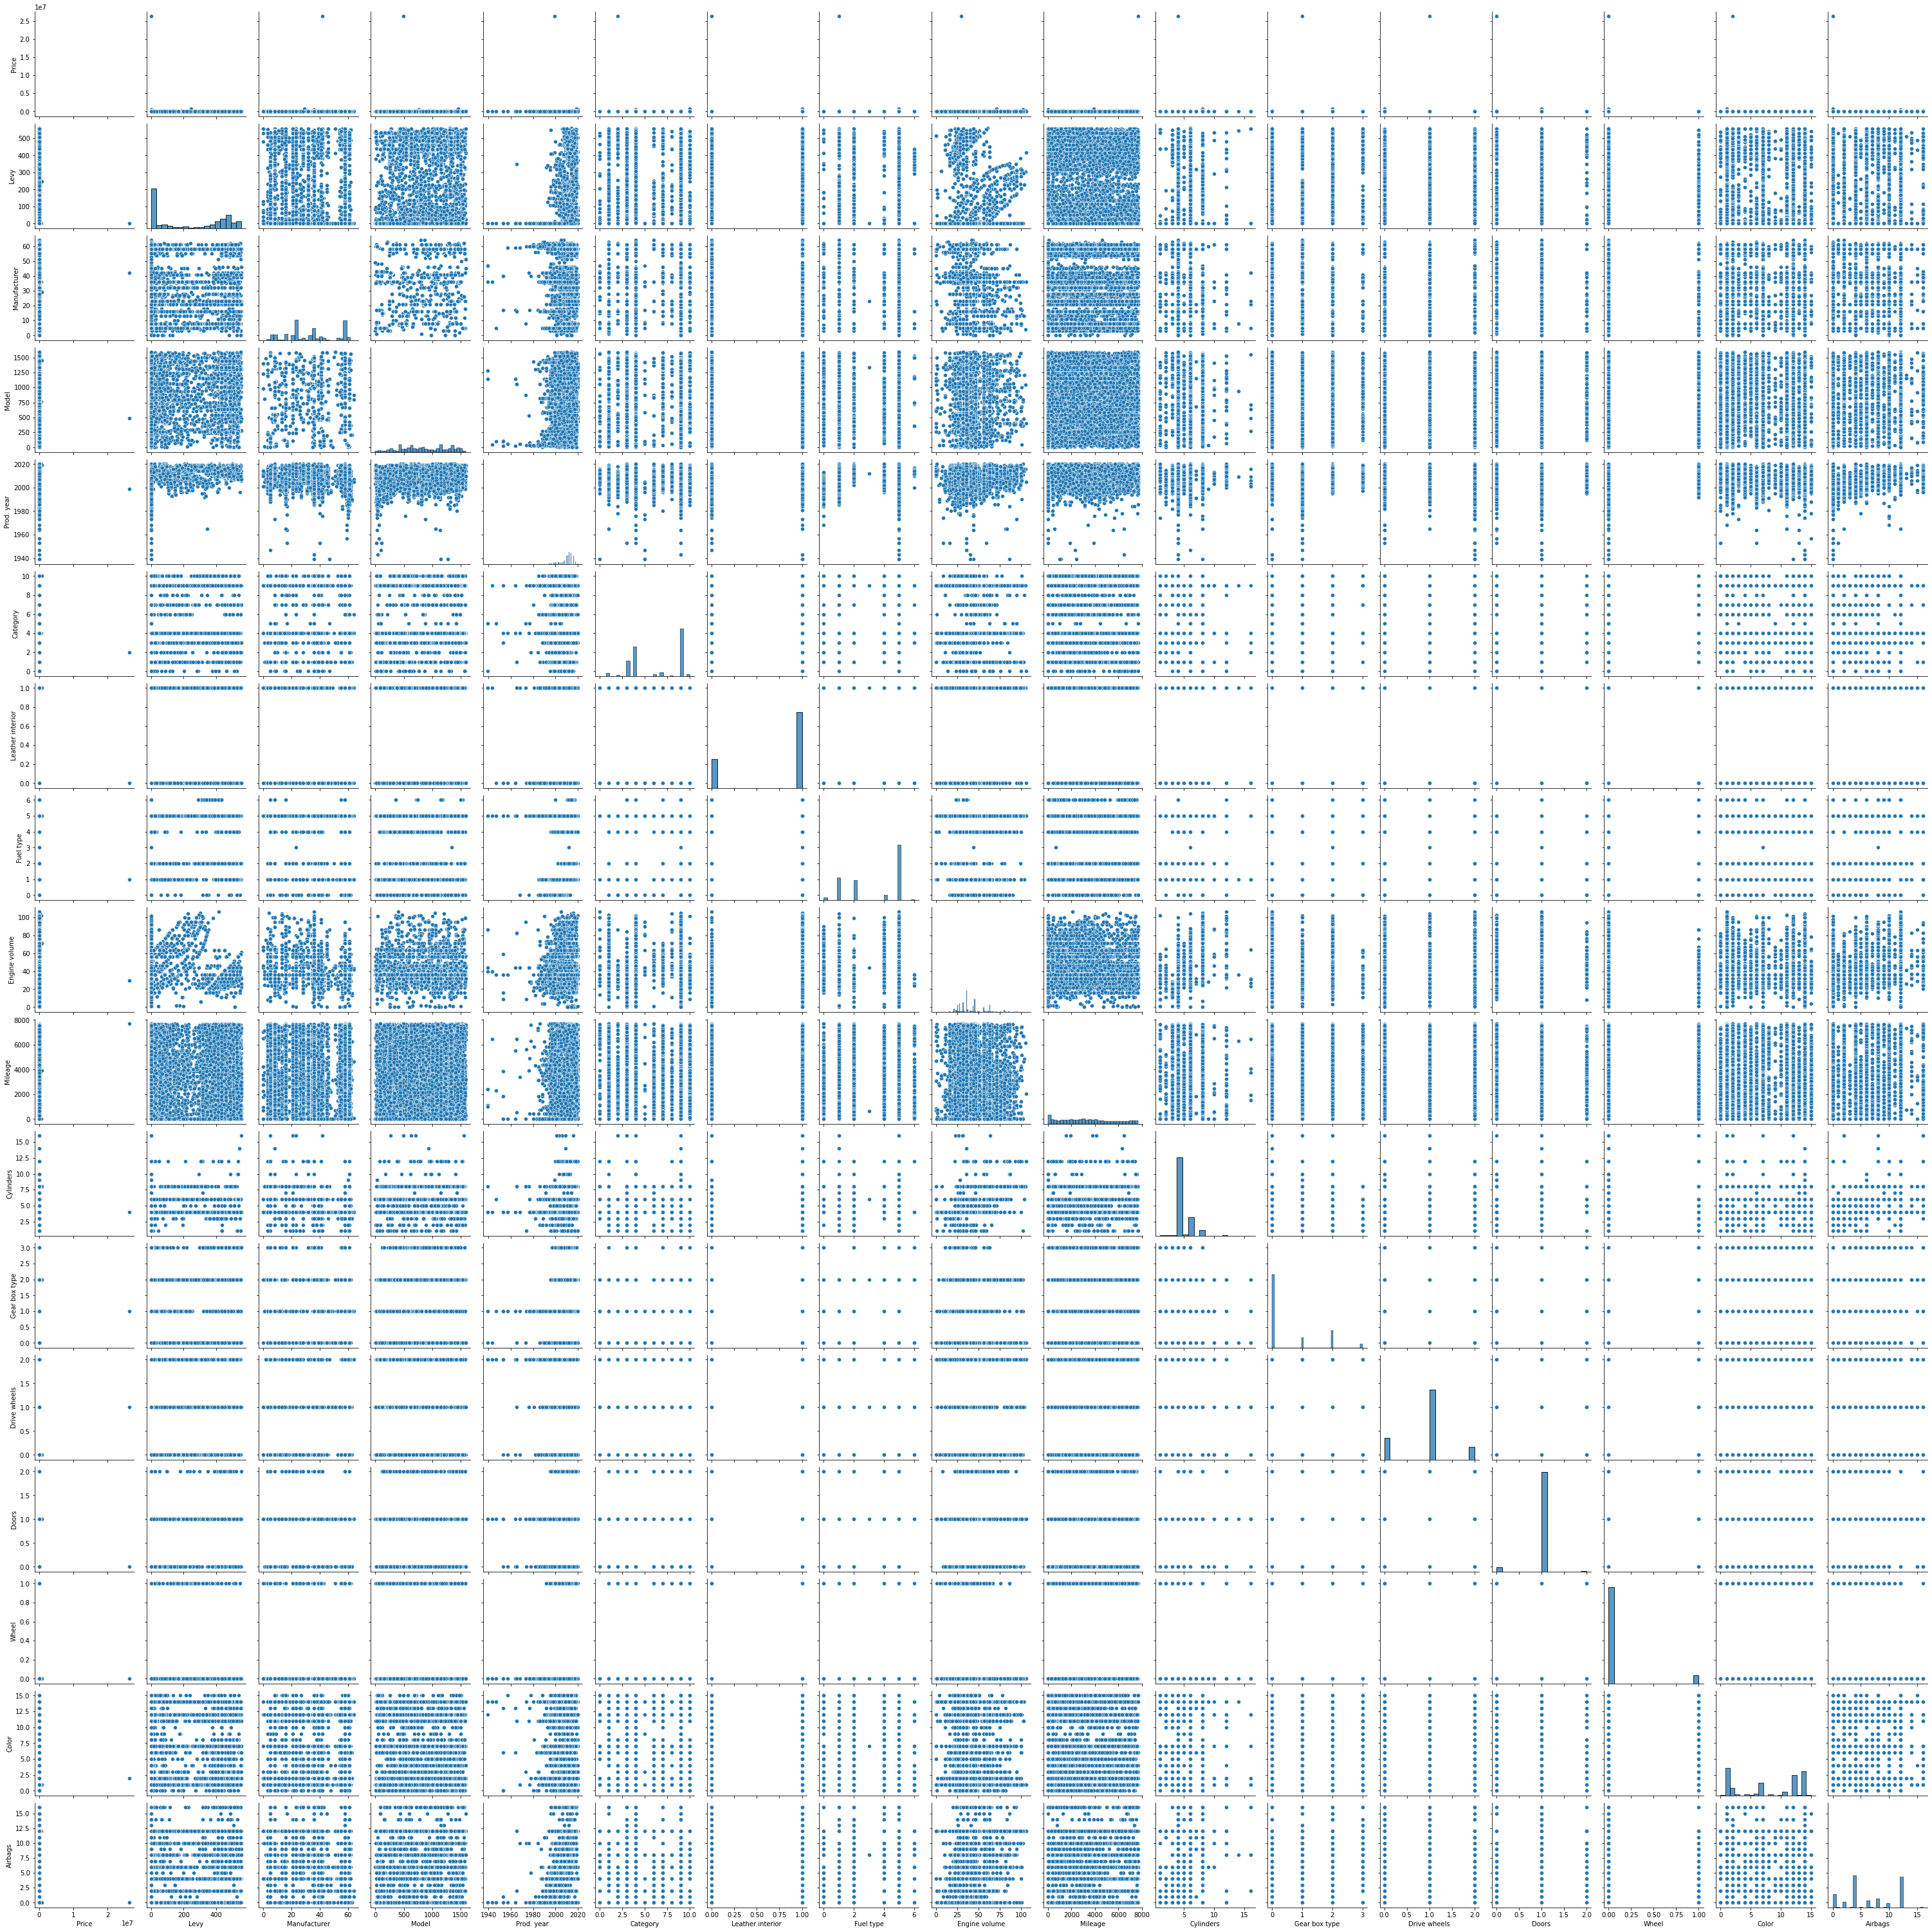

In [22]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df)

# Correlation

<AxesSubplot:>

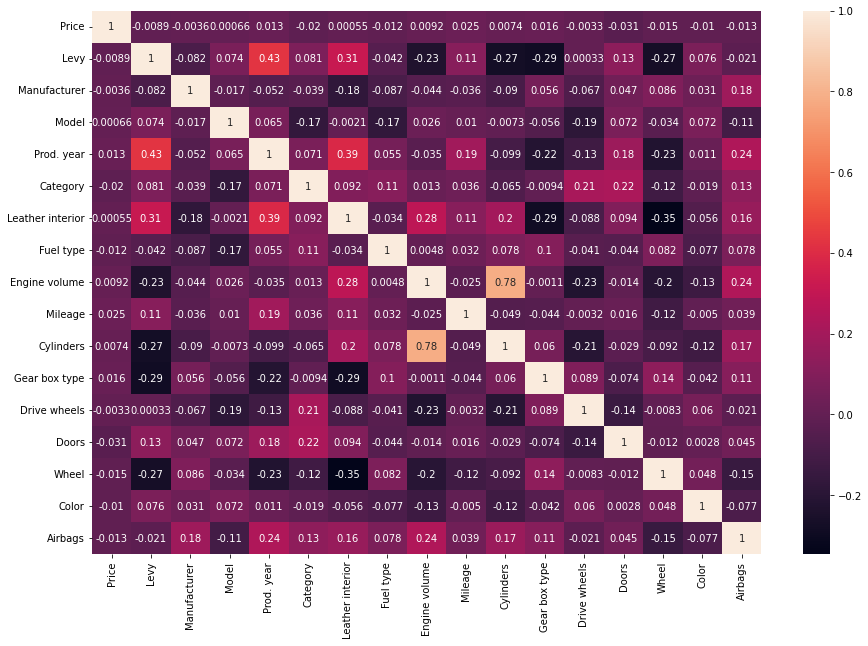

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True)

We can see from the above that none of our data features are in correlation to our target variable, `Price`

In [24]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,11726,366,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4


In [25]:
X = df.drop("Price", axis=1)
y = df.iloc[:, [0]]

In [26]:
X.head(3)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2


In [27]:
y.head(3)

,Price
0,13328
1,16621
2,8467


# Splitting

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [30]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (15139, 16)
X_test: (3785, 16)
y_train: (15139, 1)
y_test: (3785, 1)


In [31]:
# Scaling our data 
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
print(X_train.shape)
print(X_test.shape)

(15139, 16)
(3785, 16)


# Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression 

In [36]:
lr = LinearRegression()

In [37]:
# we will need to determine the best of parameter for the model using the gridsearchcv
from sklearn.model_selection import GridSearchCV

In [38]:
parameter = {"fit_intercept":[True, False], "normalize":[True, False]}
lrcv = GridSearchCV(lr, parameter, scoring='r2', cv=5)
lrcv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [39]:
lrcv.best_params_

{'fit_intercept': True, 'normalize': True}

We will be making use of this best parameters shortly, before then, lets proceed to train and get the rsquared score of this crossvalidation model.

In [40]:
from sklearn.metrics import r2_score
lrcv_predict = lrcv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=lrcv_predict)
score

-0.0516109578047923

Now let us make use of the best parameters

In [41]:
linear_model = LinearRegression(fit_intercept=True, normalize=True)
linear_model.fit(X_train, y_train)
predict_1 = linear_model.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [42]:
r2_score(y_true=y_test, y_pred=predict_1)

-0.0516109578047923

> We can see that the GridSearchCV also, by default, makes use of the best parameter values for our model. This is so because the score result from both the GridSearchCV and that of the model itself gave us the same score.

# Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dtree = DecisionTreeRegressor(random_state=0)

In [45]:
parameter = {"criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
             "max_features":['auto', 'sqrt', 'log2'],
            "max_leaf_nodes":[5,10,100,200,50,20]}
dtreecv = GridSearchCV(dtree, parameter, scoring='neg_mean_squared_error', cv=5)
dtreecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 100, 200, 50, 20]},
             scoring='neg_mean_squared_error')

In [46]:
prediction = dtreecv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.28136291872764585

Now using best parameters

In [47]:
dtreecv.best_params_

{'criterion': 'absolute_error', 'max_features': 'auto', 'max_leaf_nodes': 100}

In [48]:
decision_tree = DecisionTreeRegressor(criterion='absolute_error', max_features= 'auto', max_leaf_nodes=100, random_state=0)
decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.28136291872764585

# Lasso Model

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso(random_state=0)

In [51]:
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
lassocv=GridSearchCV(lasso,parameter,scoring='r2',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]}, scoring='r2')

In [52]:
prediction = lassocv.predict(X_test)
score = r2_score(y_true = y_test, y_pred=prediction)
score

-0.05152723954943461

In [53]:
lassocv.best_params_

{'alpha': 1}

In [54]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
prediction = lasso_model.predict(X_test)
score = r2_score(y_true = y_test, y_pred=prediction)
score

-0.05152723954943461

# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf =RandomForestRegressor(random_state= 0)

In [57]:
parameter = {
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
rfcv = GridSearchCV(rf,parameter,scoring='r2',cv=5)
rfcv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2')

In [58]:
prediction = rfcv.predict(X_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

-0.2338002406968589

In [59]:
rfcv.best_params_

{'max_features': 2, 'n_estimators': 1000}

In [60]:
random_forest = RandomForestRegressor(random_state=0, max_features =2, n_estimators = 1000)
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)
score = r2_score(y_true = y_test, y_pred=prediction)
score

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


-0.2338002406968589

# KNeighbor

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
kn = KNeighborsRegressor()

In [63]:
parameter = {"n_neighbors":[1,2,3,4,5,10,20,50]}
kncv = GridSearchCV(kn,parameter, scoring='r2',cv=5)
kncv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 50]},
             scoring='r2')

In [64]:
prediction = kncv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.30743828972672216

In [65]:
kncv.best_params_

{'n_neighbors': 5}

In [66]:
kneighbors = KNeighborsRegressor(n_neighbors=5)
kneighbors.fit(X_train, y_train)
prediction = kneighbors.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.30743828972672216

# XGB Regressor

In [67]:
from xgboost import XGBRegressor

In [68]:
xgb = XGBRegressor()

In [69]:
parameters = {'learning_rate': [.03, 0.05, .07], 'n_estimators': [100, 200,500]}

xgbcv =GridSearchCV(xgb,parameter, scoring='neg_mean_squared_error',cv=5)
xgbcv.fit(X_train, y_train)

[12:18:12] WARNING: ../src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:18:15] WARNING: ../src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:18:16] WARNING: ../src/learner.cc:627: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [70]:
prediction = xgbcv.predict(X_test)
score = r2_score(y_true=y_test, y_pred=prediction)
score

0.5043862440575382

> NB: Hyperparameter tuning takes a whole lot of time for processing (it depends on the power of your computer).

# Author's Note:
Thank you so very much for taking out your time to look at my work. I will really appreciate any corrections or feedback. Hopefully, I will come again with **Part 2** of this work which will include some feature engineering and taking care of outliers. Until then, keep learning! GRACIAS.